## **Fremont Bridge - Bicycle Counter - Days of Week - Data Analysis**
Applying data and analytical ML principles to the Fremont Bridge Bicycle Counter to analyze commute information regarding days of the week and sidewalk data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

C:\Users\gubil\AppData\Local\Temp\ipykernel_25460\4245401231.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Import Data

In [2]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)

C:\Users\gubil\AppData\Local\Temp\ipykernel_25460\4012390429.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)


## Plot Data to Analyze Patterns and Trends:

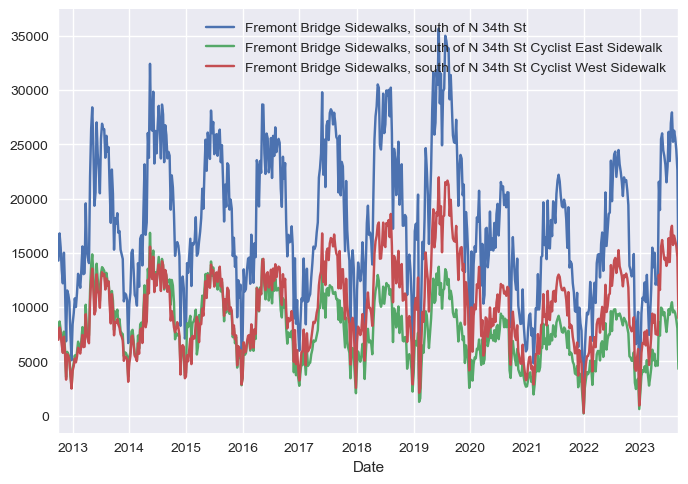

In [3]:
data.resample('W').sum().plot();

Use Seaborn Style Plot to display the use of Fremont Bridge Sidewalks over time

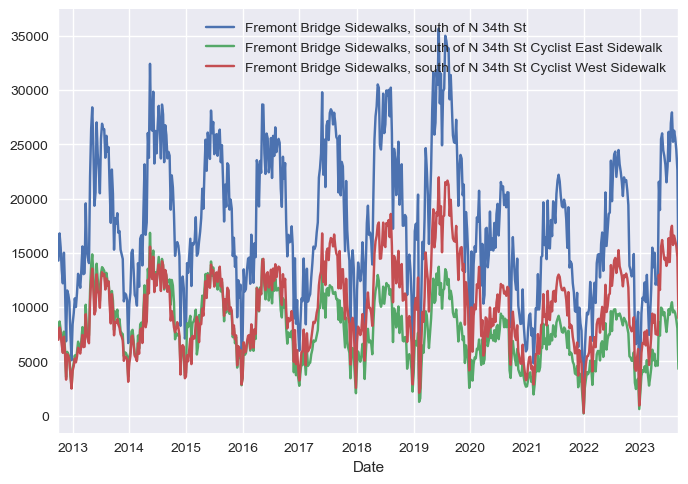

In [4]:
data.resample('W').sum().plot();

Finding the sum of the rides in the previous 365 days (Annual Trends of Bicycle Rides on Each Sidewalk)

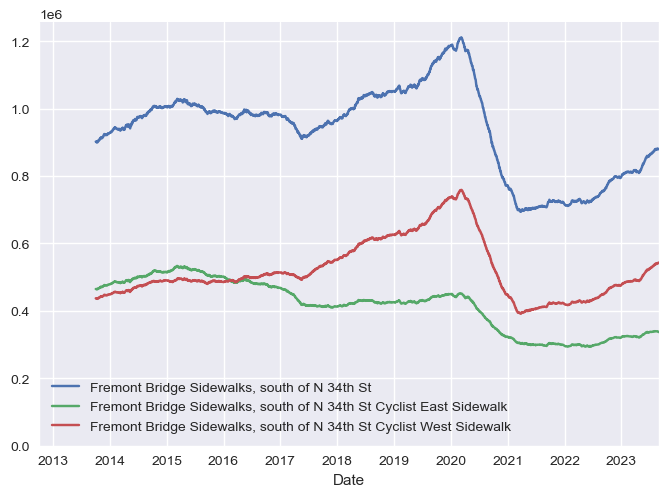

In [5]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

Group the Bicycle Riders by time of day, Finding the Mean, and Plotting this Mean.

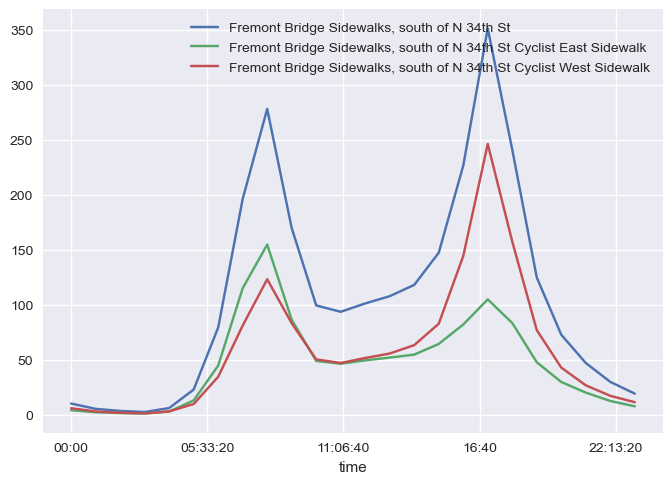

In [6]:
data.groupby(data.index.time).mean().plot();

In [7]:
pivoted = data.pivot_table('Fremont Bridge Sidewalks, south of N 34th St', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


Plot transparent lines of all commutes over time on the same plot to visualize the trend of passage of bicycle riders.

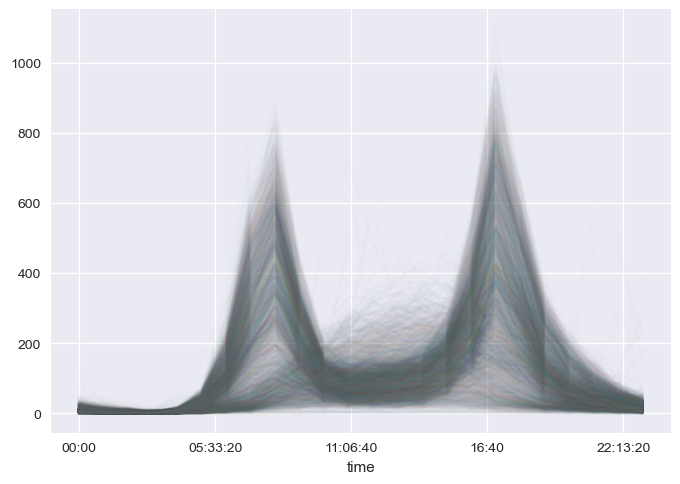

In [8]:
pivoted.plot(legend=False, alpha = 0.01);

## Analysis of Principal Components

In [9]:
X = pivoted.fillna(0).T.values
X.shape

(3985, 24)

In [10]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [11]:
X2.shape

(3985, 2)

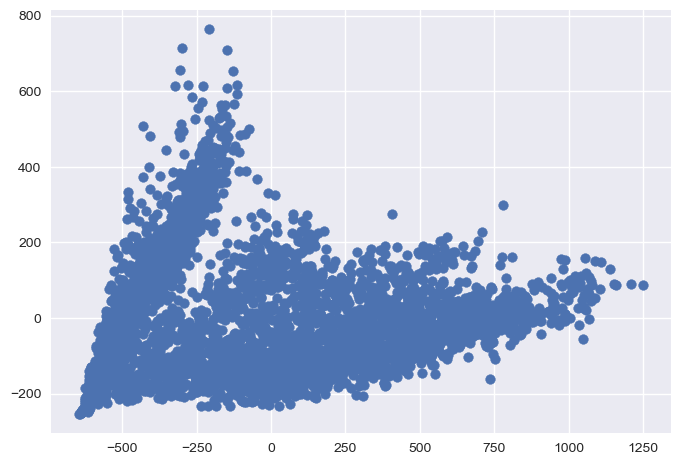

In [12]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clusterising

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Create a plot where purple shows commute days and red shows non commute days, regarding Fremont Bridge Bicyclists' Usage:

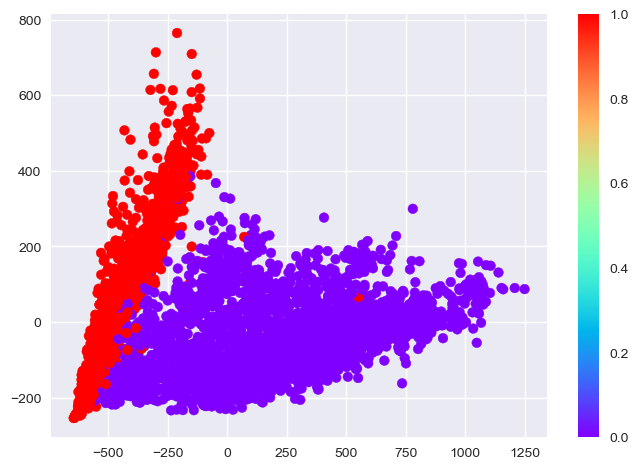

In [14]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

Examine what is going on within each cluster:

<Axes: xlabel='time'>

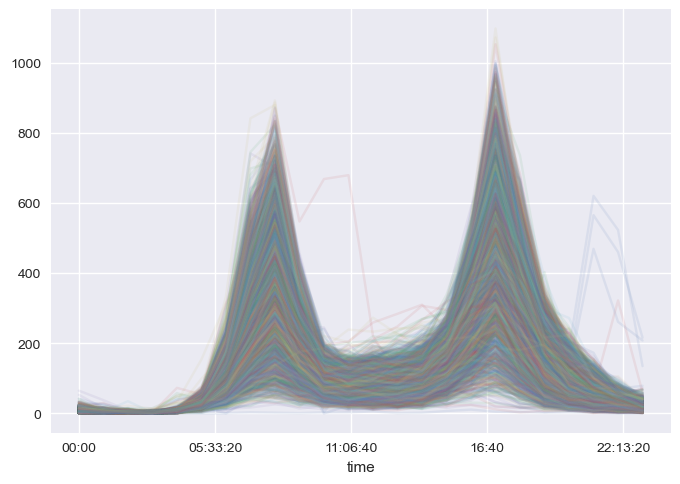

In [15]:
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)

<Axes: xlabel='time'>

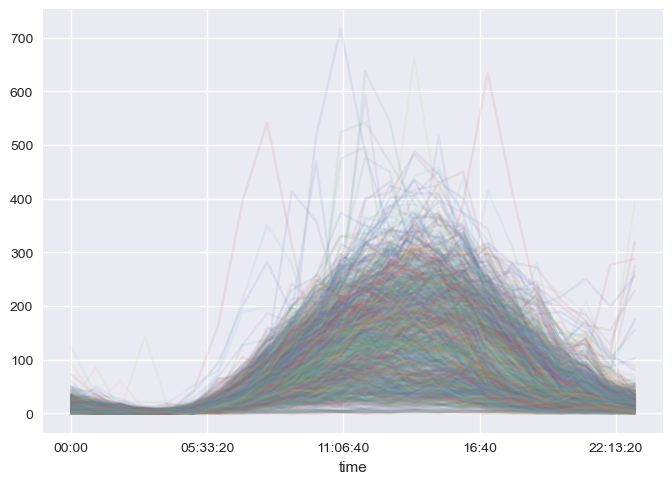

In [16]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)

## Comparison with Day of Week and Bicycle Commutes

In [17]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

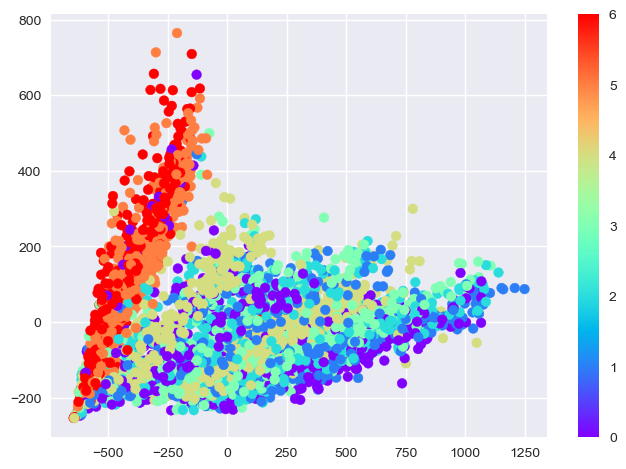

In [18]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

Find all of the days that are commute days on the Fremont Bridge that are have the qualities of a non-commute day. Outliers in the usage of the bridge to ride bicycle?

# Analyzing Outliers within the DataSet Regarding Specific Dates - Holiday Patterns

In [19]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29',
               ...
               '2022-12-22', '2022-12-23', '2022-12-26', '2022-12-27',
               '2022-12-30', '2023-01-02', '2023-01-16', '2023-02-20',
               '2023-05-29', '2023-07-04'],
              dtype='datetime64[ns]', length=111, freq=None)